# **Herramientas de Análisis**

---
---

<!-- script html for image -->

<center>


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/ac/Sw-ep1-logo.svg/1280px-Sw-ep1-logo.svg.png"  width="500" height="150"/>


<br>

Fuente de la imagen: [https://es.wikipedia.org](https://es.wikipedia.org/wiki/Star_Wars:_Episodio_I_-_La_amenaza_fantasma)

</center>

<br>

# **Índice**

---
---

> [Herramientas de Análisis](#scrollTo=tW3jK_BDgjno&line=20&uniqifier=1)
<br>
>>
>> [Preparación del Entorno](#scrollTo=5zZfGqOugjnr&line=3&uniqifier=1) \\
>>   \\
>> [Ejercicio 2](#scrollTo=EljLebnxgjqM) \\

# Preparación del entorno

Padawan! Cuando inicies sesión en Colab, prepara el entorno ejecutando el siguiente código.

In [1]:
if 'google.colab' in str(get_ipython()):
    !git clone https://github.com/griu/mbdds_fc20.git /content/mbdds_fc20
    !git -C /content/mbdds_fc20 pull
    %cd /content/mbdds_fc20/Python
    !python -m pip install -r requirementsColab.txt

fatal: destination path '/content/mbdds_fc20' already exists and is not an empty directory.
Already up to date.
/content/mbdds_fc20/Python


# Ejercicio 2

Para el ejercicio 2, añadimos los datos del ejercicio 1 los datos de planetas.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # para el estilo de graficos

entidades = ['planets','starships','vehicles','people','species']
entidades_df = {x: pd.read_pickle('www/' + x + '_df.pkl') for x in entidades}

# Datos people
people_df = entidades_df['people'][["height","mass","birth_year","gender","homeworld"]].dropna()

# planetas
planets_df = entidades_df['planets'][["orbital_period","url"]].dropna()
planets_df.head()

,orbital_period,url
name,,
Tatooine,304.0,http://swapi.dev/api/planets/1/
Alderaan,364.0,http://swapi.dev/api/planets/2/
Yavin IV,4818.0,http://swapi.dev/api/planets/3/
Hoth,549.0,http://swapi.dev/api/planets/4/
Dagobah,341.0,http://swapi.dev/api/planets/5/


## Ejercicio 2.1.

Construye una función que diga "buenos días", "buenas tardes" o "buenas noches" en función de la hora del día.

> Truco 1: Para testear la función haz que tenga un parametro de entrada que tenga como valor por defecto: `datetime.now()` (primero carga `from datetime import datetime`).

> Truco 2: Puedes extraer la hora de un datetime con `.hour`.

In [3]:
# Solución:
from datetime import datetime

hora_actual = datetime.now()
hora = hora_actual.hour

def saludar(hora):
  if hora >= 6 and hora < 12:
    print("Buenos días")
  elif hora >= 12 and hora < 19:
    print("Buenas tardes")
  else:
    print("Buenas noches")

# La función se construyó con las horas acostumbradas en Costa Rica para decir los distintos saludos. 

saludar(hora)

Buenas noches


## Ejercicio 2.2.

En el data frame personajes_df, calcula de nuevo el IMC y crea una nueva variable con el trameado de la variable IMC definido en la siguiente tabla:

 | Categoría de nivel de peso | Intervalo del percentil |
 | -------------------------- | ----------------------- | 
 | Bajo peso | < 18.5 |
 | Normal | >= 18.5 y < 25 |
 | Sobrepeso | >= 25 y <30 |
 | Obeso | >= 30 |

> Truco: utiliza `pd.cut(..., right=False)` y modifica las etiquetas con `.cat.categories`.  

In [4]:
# Solución:
# Creando nueva columna IMC
people_df["IMC"] = people_df.mass/(people_df.height/100)**2

In [5]:
# Creando columna con el trameado de la variable IMC
people_df["Tramos_IMC"] = pd.cut(people_df.IMC,[-np.infty,18.5,25,30,np.infty], right=False)
people_df[["IMC","Tramos_IMC"]].head(5)

,IMC,Tramos_IMC
name,,
Luke Skywalker,26.027582,"[25.0, 30.0)"
C-3PO,26.892323,"[25.0, 30.0)"
R2-D2,34.722222,"[30.0, inf)"
Darth Vader,33.330066,"[30.0, inf)"
Leia Organa,21.777778,"[18.5, 25.0)"


In [9]:
# Modificando las etiquetas
people_df["Tramos_IMC"].cat.categories = ["Bajo peso","Normal","Sobrepeso", "Obeso"]
people_df[["IMC","Tramos_IMC"]].head()

,IMC,Tramos_IMC
name,,
Luke Skywalker,26.027582,Sobrepeso
C-3PO,26.892323,Sobrepeso
R2-D2,34.722222,Obeso
Darth Vader,33.330066,Obeso
Leia Organa,21.777778,Normal


## Ejercicio 2.3.

Muestra las frecuencias de la nueva variable definida en 2.2.

In [10]:
# Solución:
people_df["Tramos_IMC"].value_counts().sort_index()

Bajo peso     4
Normal       14
Sobrepeso    11
Obeso         7
Name: Tramos_IMC, dtype: int64

## Ejercicio 2.4.

Calcula ahora un trameado de la edad en 5 grupos equiprobables.

Muestra los recuentos (frecuencias) de la nueva obtenida por pantalla.

> Truco: Busca ayuda de la función [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)

In [11]:
# Solución:
people_df['Tramo_edad'] = pd.qcut(people_df.birth_year, 5)

# Mostrando el recuento de la nueva variable de edad con 5 grupos equiprobables
people_df["Tramo_edad"].value_counts().sort_index()

(7.999, 29.0]    8
(29.0, 41.9]     8
(41.9, 52.0]     6
(52.0, 82.0]     7
(82.0, 896.0]    7
Name: Tramo_edad, dtype: int64

## Ejercicio 2.5.

Presenta la tabla cruzada de tramos de edad (ej. 2.4) por tramos de IMC (ej. 2.2). 

¿Qué tramo de edad tiene un mayor número de personajes con Bajo peso?

In [12]:
# Solución:
tabla_cruzada_tramos = pd.crosstab(people_df.Tramo_edad,people_df.Tramos_IMC)
tabla_cruzada_tramos

Tramos_IMC,Bajo peso,Normal,Sobrepeso,Obeso
Tramo_edad,,,,
"(7.999, 29.0]",0,3,4,1
"(29.0, 41.9]",1,2,3,2
"(41.9, 52.0]",3,1,1,1
"(52.0, 82.0]",0,4,2,1
"(82.0, 896.0]",0,4,1,2


### Análisis:

Se puede observar que el tramo de la edad que presenta mayor cantidad de personajes con bajo peso es el de 41.9 a 52 años de edad con 3 personajes respectivamente.  

## Ejercicio 2.6.

Calcula una tabla resumen (data frame) donde se presente la media del IMC en cada tramo de edad calculado en ejercicio 2.4.

Presenta por pantalla la nueva tabla resumen.


In [13]:
# Solución:
summ_IMC_edad = people_df.groupby(["Tramo_edad"])["IMC"].mean()
summ_IMC_edad

Tramo_edad
(7.999, 29.0]    25.960538
(29.0, 41.9]     26.242997
(41.9, 52.0]     22.972490
(52.0, 82.0]     24.774935
(82.0, 896.0]    85.311313
Name: IMC, dtype: float64

## Ejercicio 2.7.

Presenta los datos del ej. 2.6. como un gráfico de líneas donde el eje x sea la edad y el eje y el IMC medio.

> Truco: Como eje x del gráfico de líneas, puedes calcular en 2.6., en el mismo cálculo del IMC medio, la mediana de edad de cada tramo de edad.

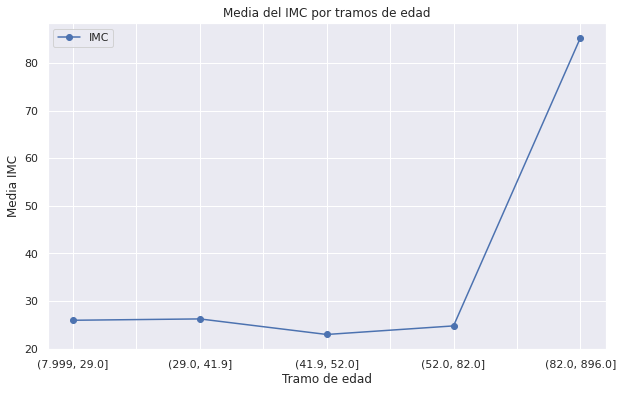

In [14]:
# Solución:
sns.set
people_df.groupby(["Tramo_edad"])["IMC"].mean().plot(title = "Media del IMC por tramos de edad", 
                                                     style='o-',
                                                     colormap = "inferno",
                                                     legend = True,
                                                     xlabel = "Tramo de edad", 
                                                     ylabel = "Media IMC",
                                                     figsize=(10, 6));

## Ejercicio 2.8.

Calcula el ratio del IMC sobre la mediana del IMC de su tramo de edad (definidos en el ejercicio 2.2.) mediante la función groupby(...).apply(...).

> truco: primero crea una función que devuelva:  `x / np.nanmedian(x)`.

Presenta los datos mediante un boxplot de la nueva variable: [pd.boxplot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html). 

In [15]:
# Solución:
def mediana(x):
  x['Ratio_IMC'] = x['IMC']/np.nanmedian(x['IMC'])
  return x

people_df = people_df.groupby(["Tramo_edad"]).apply(mediana)

people_df.head(5)

,height,mass,birth_year,gender,homeworld,IMC,Tramos_IMC,Tramo_edad,Ratio_IMC
name,,,,,,,,,
Luke Skywalker,172.0,77.0,19.0,male,http://swapi.dev/api/planets/1/,26.027582,Sobrepeso,"(7.999, 29.0]",1.022508
C-3PO,167.0,75.0,112.0,none,http://swapi.dev/api/planets/1/,26.892323,Sobrepeso,"(82.0, 896.0]",1.125519
R2-D2,96.0,32.0,33.0,none,http://swapi.dev/api/planets/8/,34.722222,Obeso,"(29.0, 41.9]",1.366115
Darth Vader,202.0,136.0,41.9,male,http://swapi.dev/api/planets/1/,33.330066,Obeso,"(29.0, 41.9]",1.311342
Leia Organa,150.0,49.0,19.0,female,http://swapi.dev/api/planets/2/,21.777778,Normal,"(7.999, 29.0]",0.855552


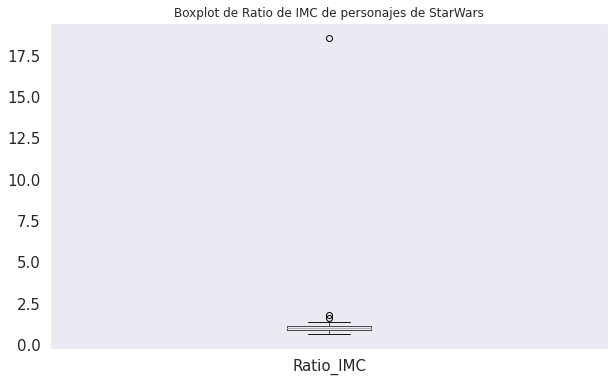

In [16]:
# Boxplot de la nueva variable
people_df.boxplot(column=['Ratio_IMC'], grid = False, figsize=(10,6), fontsize=15)
plt.title("Boxplot de Ratio de IMC de personajes de StarWars")
plt.show()


## Ejercicio 2.9.

¿Cual es planeta con un menor índice IMC medio de sus personajes?
¿Que personaje/s son de ese planeta?

In [18]:
# Solución:
# Uniendo los datasets
planetas = pd.merge(people_df.reset_index(), 
                         planets_df.reset_index(), left_on=["homeworld"], right_on=["url"])
planetas.index= planetas.name_x 
planetas.head(5)

,name_x,height,mass,birth_year,gender,homeworld,IMC,Tramos_IMC,Tramo_edad,Ratio_IMC,name_y,orbital_period,url
name_x,,,,,,,,,,,,,
Luke Skywalker,Luke Skywalker,172.0,77.0,19.0,male,http://swapi.dev/api/planets/1/,26.027582,Sobrepeso,"(7.999, 29.0]",1.022508,Tatooine,304.0,http://swapi.dev/api/planets/1/
C-3PO,C-3PO,167.0,75.0,112.0,none,http://swapi.dev/api/planets/1/,26.892323,Sobrepeso,"(82.0, 896.0]",1.125519,Tatooine,304.0,http://swapi.dev/api/planets/1/
Darth Vader,Darth Vader,202.0,136.0,41.9,male,http://swapi.dev/api/planets/1/,33.330066,Obeso,"(29.0, 41.9]",1.311342,Tatooine,304.0,http://swapi.dev/api/planets/1/
Owen Lars,Owen Lars,178.0,120.0,52.0,male,http://swapi.dev/api/planets/1/,37.874006,Obeso,"(41.9, 52.0]",1.799920,Tatooine,304.0,http://swapi.dev/api/planets/1/
Beru Whitesun lars,Beru Whitesun lars,165.0,75.0,47.0,female,http://swapi.dev/api/planets/1/,27.548209,Sobrepeso,"(41.9, 52.0]",1.309198,Tatooine,304.0,http://swapi.dev/api/planets/1/


In [19]:
# Agrupando el dataset por nombre del personaje e IMC
planetas_2 = planetas.groupby(["name_y"])[["IMC"]].mean()
# Ordenando la variable IMC en forma ascendente 
planetas_2.IMC.sort_values(ascending=True)

name_y
Ryloth         17.358919
Cerea          20.916233
Kashyyyk       21.545091
Alderaan       21.777778
Dorin          22.634676
Naboo          22.750601
Kamino         23.350951
Haruun Kal     23.766410
Rodia          24.725183
Socorro        25.216253
Mon Cala       25.617284
Corellia       25.667478
Bespin         25.795918
Endor          25.826446
Dathomir       26.122449
Tatooine       28.645923
Trandosha      31.301939
unknown        32.639963
Nal Hutta     443.428571
Name: IMC, dtype: float64

In [20]:
# Obteniendo el nombre del personaje
planetas.name_x[planetas.name_y == "Ryloth"]

name_x
Ayla Secura    Ayla Secura
Name: name_x, dtype: object

### Análisis
Se puede observar que el planeta que tiene el IMC medio más bajo corresponde al planeta Ryloth y el único personaje que es de ese planeta es Ayla Secura.

## Ejercicio 2.10.

Convierte a datetime los siguientes strings con la función [datetime.strptime()](https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior) (consulta la ayuda si es necesario) de la libreria datetime:

- "1 january, 2020"
- "15-feb.-2017"
- "20190701 22:30"  # 1 de julio de 2019



In [21]:
# Solución:
# 1) "1 january, 2020"

date_string = "1 january, 2020"
date_object = datetime.strptime(date_string, "%d %B, %Y")
print(date_object)

2020-01-01 00:00:00


In [26]:
# 2) "15-feb.-2017"

date_string_2 = "15-feb.-2017"
date_object_2 = datetime.strptime(date_string_2, "%d-%b.-%Y")
print(date_object_2)

2017-02-15 00:00:00


In [28]:
# 3) "20190701 22:30" # 1 de julio de 2019

date_string_3 = pd.to_datetime("20190701 22:30")
date_string_3 = date_string_3.strftime("%d de %B de %Y")
print(date_string_3)

01 de July de 2019
